---
# NIM: 2602198812
# Nama: I Gusti Bagus Ramadha Saverian Ranuh
# Class: LD01
# Assignment Number: 02
---

In [1]:
# Env: Python 3.10.13

# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import seaborn as sns

1. Read Data

In [2]:
data = pd.read_csv('home.txt')
data.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


2. Export dataset

In [3]:
# Add new row data & change column name
new_data = pd.DataFrame({'2104': ['2104'], '3': ['3'], '399900': ['39900']}, index=[0])
new_column_name = {'2104': 'Size', '3': 'Bedroom', '399900': 'Price'}
data = pd.concat([data, new_data], axis=0, ignore_index=True)
data = data.rename(columns=new_column_name)

In [4]:
data

,Size,Bedroom,Price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900
5,1534,3,314900
6,1427,3,198999
7,1380,3,212000
8,1494,3,242500
9,1940,4,239999


3. Exploratory Data Analysis

In [5]:
# Exploratory Data Analysis
print("Shape of data:",data.shape)
# 47 rows, 3 columns

Shape of data: (47, 3)


In [6]:
print("Data types of each columns:\n", data.dtypes)

# Change object to float
data=data.astype("float64")

print("Data types of each columns:\n", data.dtypes)

Data types of each columns:
 Size       object
Bedroom    object
Price      object
dtype: object
Data types of each columns:
 Size       float64
Bedroom    float64
Price      float64
dtype: object


In [7]:
list(data.columns)

['Size', 'Bedroom', 'Price']

In [8]:
data.describe()

,Size,Bedroom,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,332753.085106
std,794.702354,0.760982,132141.277045
min,852.000000,1.000000,39900.000000
25%,1432.000000,3.000000,246400.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,368750.000000
max,4478.000000,5.000000,699900.000000


In [9]:
np.round(data.isnull().sum())

Size       0
Bedroom    0
Price      0
dtype: int64

In [10]:
for i in data: # Loop through the numeric features
    print(f'{i}: {"Not Gaussian" if normaltest(data[i])[1] < 0.05 else "Gaussian"} {normaltest(data[i].values)}')

Size: Not Gaussian NormaltestResult(statistic=16.522646706415998, pvalue=0.000258316920406429)
Bedroom: Gaussian NormaltestResult(statistic=1.7989277241826165, pvalue=0.4067876955911296)
Price: Not Gaussian NormaltestResult(statistic=6.11549474095976, pvalue=0.04699343487779548)


e:\Users\ravendrasr\Documents\Semester 4\Machine Learning\ML env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Users\ravendrasr\Documents\Semester 4\Machine Learning\ML env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Users\ravendrasr\Documents\Semester 4\Machine Learning\ML env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


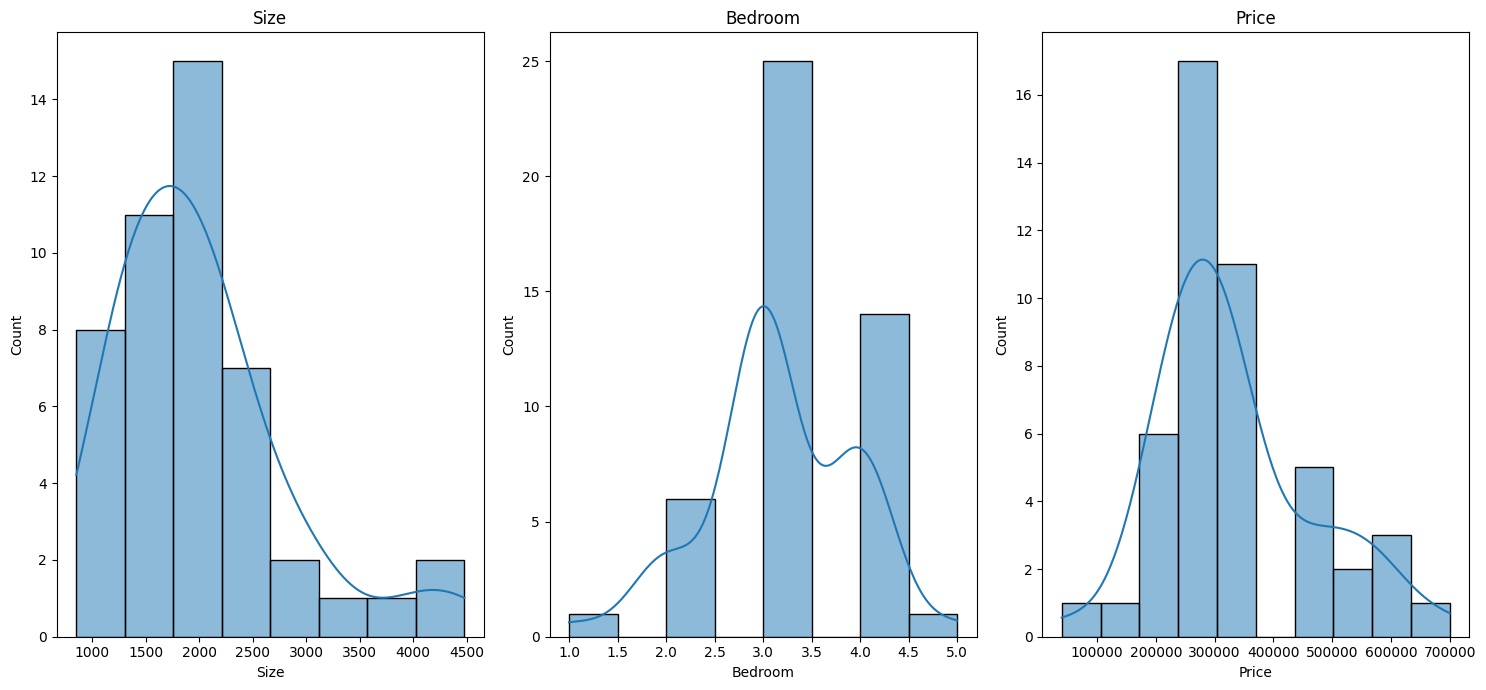

In [11]:
# Data Visualization
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.histplot(data["Size"], kde=True)
plt.title('Size')

plt.subplot(1, 3, 2)
sns.histplot(data["Bedroom"], kde=True)
plt.title('Bedroom')

plt.subplot(1, 3, 3)
sns.histplot(data["Price"], kde=True)
plt.title('Price')

plt.tight_layout()
plt.show()

In [12]:
for i in data: # Loop through the numeric features
    if data[i].notnull().any():  # Check if the feature has missing values
        if data[i].median() != 0: # Check if the median is not zero to avoid division by zero
            print(f'{i}: {np.abs(np.round((data[i].std()/data[i].median()) * 100,2))}') # Calculate the coefficient of variation for each numeric feature

Size: 42.09
Bedroom: 25.37
Price: 44.06


5. Normalize Dataset

In [13]:
def normalize(X):
    """
    Normalize the input feature matrix. 
    Normalize using Zero mean (Standardization)

    Parameters:
    X (numpy.ndarray): The input feature matrix with shape (n_samples, n_features).

    Returns:
    numpy.ndarray: The standardized input feature matrix.
    """
    mean = X.mean()
    std = X.std()
    X = (X - mean) / std
    return X
    
    

In [14]:
# Normalize the data
column_to_normalization=data.iloc[:,:-1].columns # Get the numeric features
datas=data.copy()
for i in column_to_normalization: # Loop through the numeric features 
    datas[i]=normalize(data[i])
datas

,Size,Bedroom,Price
0,-0.504190,-0.223675,329900.0
1,0.502476,-0.223675,369000.0
2,-0.735723,-1.537767,232000.0
3,1.257476,1.090417,539900.0
4,-0.019732,1.090417,299900.0
5,-0.587240,-0.223675,314900.0
6,-0.721881,-0.223675,198999.0
7,-0.781023,-0.223675,212000.0
8,-0.637573,-0.223675,242500.0
9,-0.076357,1.090417,239999.0


6. Independent and dependent variable

In [15]:
x=datas.iloc[:,:-1].values
y=datas.iloc[:,-1].values
x.shape,y.shape

((47, 2), (47,))

In [16]:
x

array([[-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.86733818e-02,  1.09041654e+00],
       [ 2.

In [17]:
y

array([329900., 369000., 232000., 539900., 299900., 314900., 198999.,
       212000., 242500., 239999., 347000., 329999., 699900., 259900.,
       449900., 299900., 199900., 499998., 599000., 252900., 255000.,
       242900., 259900., 573900., 249900., 464500., 469000., 475000.,
       299900., 349900., 169900., 314900., 579900., 285900., 249900.,
       229900., 345000., 549000., 287000., 368500., 329900., 314000.,
       299000., 179900., 299900., 239500.,  39900.])

7. Split train test dataset

In [18]:
import random # Import the random module
random.seed(42) # Set the seed to 42

def split_data(x,y,test_size=0.8): # Split the data into training and testing sets
    trainx=[]
    trainy=[]
    train_size=int(test_size*len(x))
    dataset_copy_x=list(x)
    dataset_copy_y=list(y)
    while len(trainx)<train_size: # Loop until the training set reaches the desired size
        index=random.randrange(len(dataset_copy_x))
        trainx.append(dataset_copy_x.pop(index))
        trainy.append(dataset_copy_y.pop(index))
    return np.array(trainx),np.array(dataset_copy_x),np.array(trainy),np.array(dataset_copy_y)

x_train,x_test,y_train,y_test=split_data(datas.iloc[:,:-1].values,datas.iloc[:,-1].values)

len(x_train),len(x_test),len(y_train),len(y_test)

(37, 10, 37, 10)

In [19]:
x_train

array([[ 2.98626458e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-2.94048269e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [-8.56737193e-04, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-1.00752294e+00, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-9.58447962e-01, -2.23675187e-01],
       [ 1.25747602e+00,  1.09041654e+00],
       [-7.35723065e-01, -1.53776691e+00],
       [ 3.11729182e+00,  2.40450826e+00],
       [-1.13335621e+00, -2.23675187e-01],
       [ 6.61026291e-01, -2.23675187e-01],
       [-2.03448310e-01, -1.53776691e+00],
       [-2.38681627e-01,  1.09041654e+00],
       [-5.04189838e-01, -2.23675187e-01],
       [ 1.42986760e+00, -2.23675187e-01],
       [-8.56523009e-01, -1.53776691e+00],
       [-1.44542274e+00, -1.53776691e+00],
       [-4.23656542e-01, -1.53776691e+00],
       [-1.

8. Multiple Linear Regression

In [20]:
class LinearRegression(): # Create a class for Linear Regression
    def __init__(self, lr=0.0001, n_iters=1000, threshold=1e-6): # Initialize the class
        self.lr = lr
        self.n_iters = n_iters
        self.threshold = threshold
        
        self.weights = []
        self.bias = None
        
    def MSE(self,y,y_pred): # Create a function to calculate the Mean Squared Error
        return np.mean((y-y_pred)**2)
    
    def fit_gradient_descent(self, x, y): # Create a function to fit the model using Gradient Descent
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        list_weight = []
        mse = []
        prev_mse = 0
        
        for _ in range(self.n_iters): # Loop through the number of iterations
            y_pred = np.dot(x, self.weights) + self.bias
            curr_mse = self.MSE(y, y_pred)
            
            if curr_mse and abs(prev_mse - curr_mse) < self.threshold:
                break
            
            prev_mse = curr_mse
            
            mse.append(curr_mse)
            list_weight.append(self.weights)
            
            derivative_weight = (1/n_samples) * 2 * np.dot(x.T, (y_pred - y)) # Calculate the derivative of the weights
            derivative_bias = (1/n_samples) * np.sum(2 * (y_pred - y)) # Calculate the derivative of the bias
            
            self.weights = self.weights - self.lr * derivative_weight # Update the weights and bias
            self.bias = self.bias - self.lr * derivative_bias # Update the weights and bias
        
        plt.figure(figsize=(12, 6))
        plt.plot(list_weight, mse, marker="+")
        plt.title("MSE VS Weights")
        plt.xlabel("Weight")
        plt.ylabel("MSE")
        plt.show()
        
        print("Final MSE:", mse[-1])
    
    def fit_OLS_Ordinary_Least_Squares(self,x,y): # Create a function to fit the model using Ordinary Least Squares
        x = np.insert(x, 0, 1, axis=1) 
        print(x.shape,np.dot(x.T, x).shape)
        
        betas = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)  # Calculate the betas
        self.bias = betas[0] # Set the bias
        self.weights = betas[1:] # Set the weights
            
    def predict(self,x): # Create a function to predict the target
        return np.dot(x,self.weights)+self.bias
    
            
    

8. Error Function

In [21]:
def RMSE(y_true,y_pred): # Create a function to calculate the Root Mean Squared Error
    return np.sqrt(np.mean((y_true-y_pred)**2))

def MAE(y_true,y_pred): # Create a function to calculate the Mean Absolute Error
    return np.mean(np.abs(y_true-y_pred))

def R2_Score(y_true,y_pred): # Create a function to calculate the R2 Score
    SSRes=np.sum((y_true-y_pred)**2)
    SSTot=np.sum((y_true-y_pred.mean())**2)
    return 1 -(SSRes/SSTot)

In [22]:
x_train = x_train.astype(float)
print(x_train.dtype)

float64


9. Render model and fit train test data

(37, 3) (3, 3)
Predict with Ordinary Least Square:
[266103.05383293 327820.50932177 229885.85216213 255755.28192698
 356782.21290342 180519.20324802 341435.9986717  358046.89567861
 413189.6275458  315838.87869384]


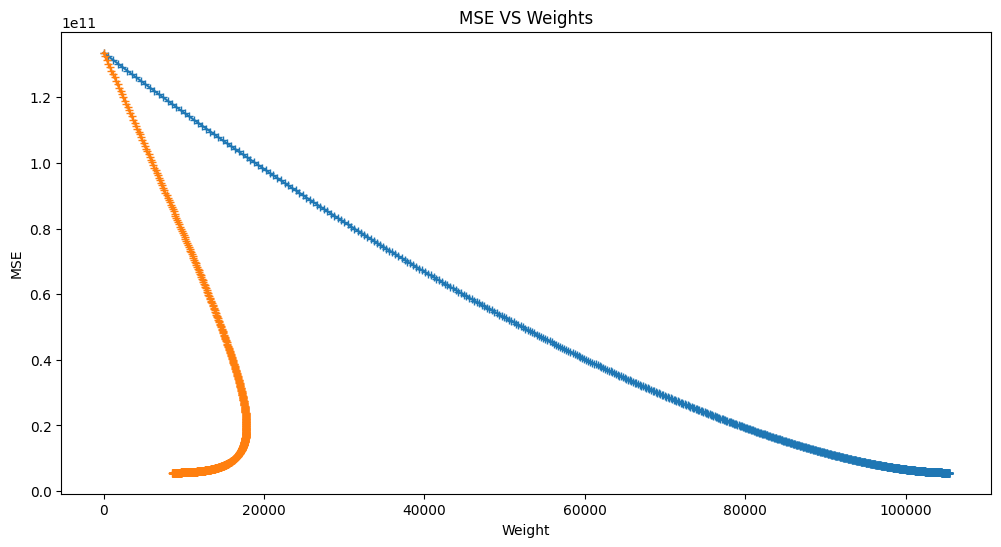

Final MSE: 5610103806.988179
Predict with Gradient Descent:
[261665.63793695 326788.10695733 226387.70344475 251586.22808204
 349993.09798132 168290.12015495 340050.48834537 356230.59363879
 409943.23826036 315117.21133585]


In [23]:
gradient_descent=LinearRegression(lr=0.002) # Create an instance of the Linear Regression class for gradient descent
ordinary_least_square=LinearRegression() # Create an instance of the Linear Regression class for OLS
ordinary_least_square.fit_OLS_Ordinary_Least_Squares(x_train,y_train) # Fit the model using OLS
y_pred1=ordinary_least_square.predict(x_test) # Predict the target
print("Predict with Ordinary Least Square:") # Print the prediction
print(y_pred1)

gradient_descent.fit_gradient_descent(x_train,y_train) # Fit the model using Gradient Descent
y_pred2=gradient_descent.predict(x_test) # Predict the target
print("Predict with Gradient Descent:") # Print the prediction
print(y_pred2)

10. Data visualization

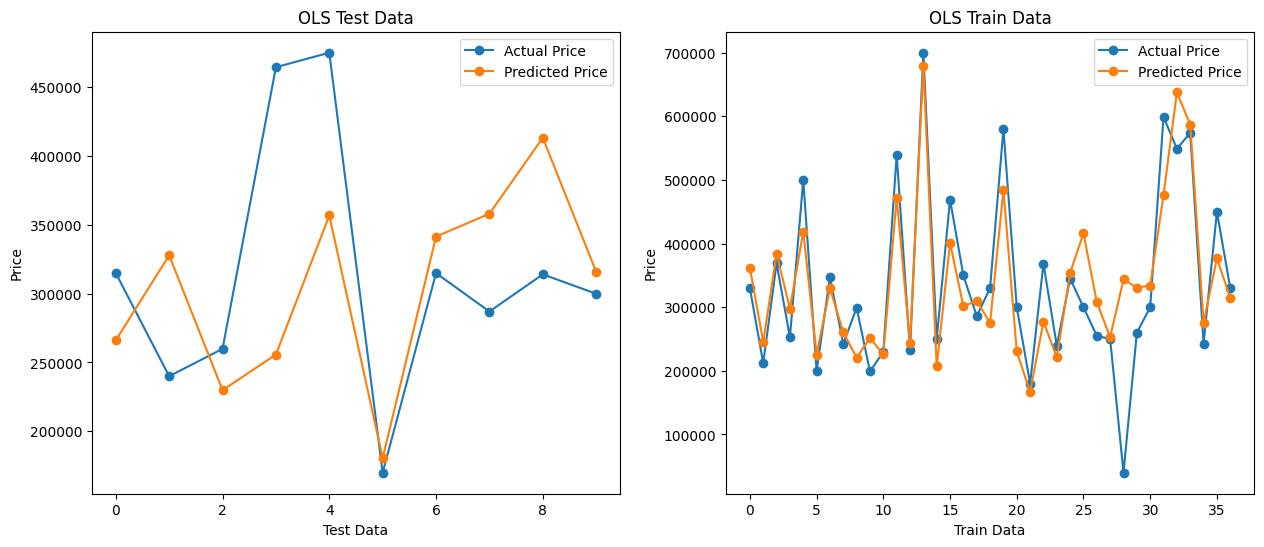

RMSE_Test: 91924.7677125167
MAE_Test: 71692.57123342842
R2_Test: -0.06206164681021464

RMSE_Train: 74628.86705636872
MAE_Train: 53063.60065416766
R2_Train: 0.7138249540566282


In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(y_test,marker="o",label="Actual Price")
ax[0].plot(ordinary_least_square.predict(x_test),marker="o",label="Predicted Price")
ax[0].set_title("OLS Test Data")
ax[0].set_xlabel("Test Data")
ax[0].set_ylabel("Price")
ax[0].legend()

ax[1].plot(y_train,marker="o",label="Actual Price")
ax[1].plot(ordinary_least_square.predict(x_train),marker="o",label="Predicted Price")
ax[1].set_title("OLS Train Data")
ax[1].set_xlabel("Train Data")
ax[1].set_ylabel("Price")
ax[1].legend()
plt.show()

rmse=RMSE(y_test,ordinary_least_square.predict(x_test))
mae=MAE(y_test,ordinary_least_square.predict(x_test))
r2=R2_Score(y_test,ordinary_least_square.predict(x_test))
print("RMSE_Test:",rmse)
print("MAE_Test:",mae)
print("R2_Test:",r2)
print()

rmse=RMSE(y_train,ordinary_least_square.predict(x_train))
mae=MAE(y_train,ordinary_least_square.predict(x_train))
r2=R2_Score(y_train,ordinary_least_square.predict(x_train))
print("RMSE_Train:",rmse)
print("MAE_Train:",mae)
print("R2_Train:",r2)

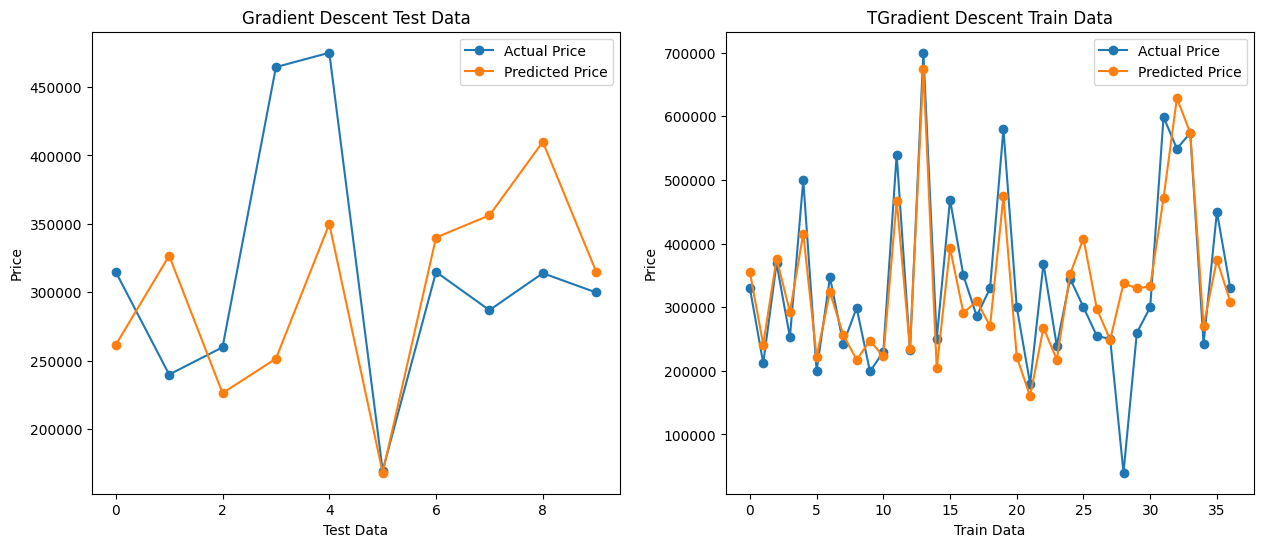

RMSE_Test: 93441.42689256772
MAE_Test: 71860.7850937701
R2_Test: -0.08513750151604738

RMSE_Train: 74898.63847041997
MAE_Train: 53086.030089050786
R2_Train: 0.7122194561842043


In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(y_test,marker="o",label="Actual Price")
ax[0].plot(gradient_descent.predict(x_test),marker="o",label="Predicted Price")
ax[0].set_title("Gradient Descent Test Data")
ax[0].set_xlabel("Test Data")
ax[0].set_ylabel("Price")
ax[0].legend()

ax[1].plot(y_train,marker="o",label="Actual Price")
ax[1].plot(gradient_descent.predict(x_train),marker="o",label="Predicted Price")
ax[1].set_title("TGradient Descent Train Data")
ax[1].set_xlabel("Train Data")
ax[1].set_ylabel("Price")
ax[1].legend()
plt.show()

rmse=RMSE(y_test,gradient_descent.predict(x_test))
mae=MAE(y_test,gradient_descent.predict(x_test))
r2=R2_Score(y_test,gradient_descent.predict(x_test))
print("RMSE_Test:",rmse)
print("MAE_Test:",mae)
print("R2_Test:",r2)
print()

rmse=RMSE(y_train,gradient_descent.predict(x_train))
mae=MAE(y_train,gradient_descent.predict(x_train))
r2=R2_Score(y_train,gradient_descent.predict(x_train))
print("RMSE_Train:",rmse)
print("MAE_Train:",mae)
print("R2_Train:",r2)

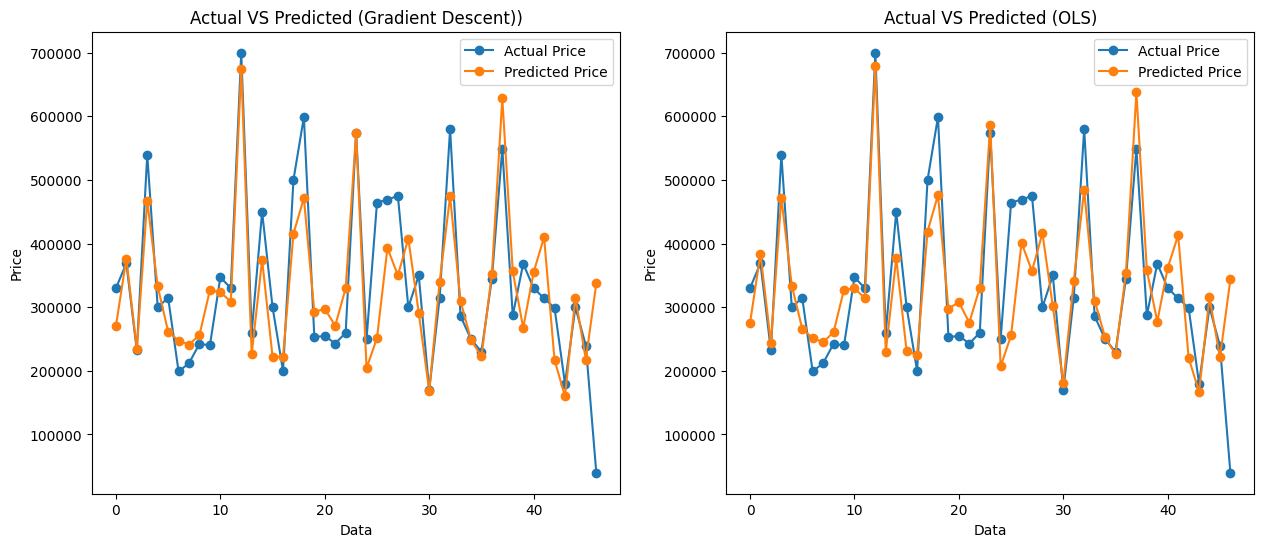

RMSE_All_Gradient_Descent: 79208.2934422972
MAE_All_Gradient_Descent: 57080.65881345914
R2_All_Gradient_Descent: 0.6340165287452135

RMSE_All_OLS: 78628.12253655925
MAE_All_OLS: 57027.2114157125
R2_All:_OLS 0.6383271967579547


In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot untuk model Linear Regression with Gradient Descent
axs[0].plot(y, marker="o", label="Actual Price")
axs[0].plot(gradient_descent.predict(x), marker="o", label="Predicted Price")
axs[0].set_title("Actual VS Predicted (Gradient Descent))")
axs[0].set_xlabel("Data")
axs[0].set_ylabel("Price")
axs[0].legend()

# Plot untuk model Linear Regression with OLS
axs[1].plot(y, marker="o", label="Actual Price")
axs[1].plot(ordinary_least_square.predict(x), marker="o", label="Predicted Price")
axs[1].set_title("Actual VS Predicted (OLS)")
axs[1].set_xlabel("Data")
axs[1].set_ylabel("Price")
axs[1].legend()

plt.show()

rmse=RMSE(y,gradient_descent.predict(x))
mae=MAE(y,gradient_descent.predict(x))
r2=R2_Score(y,gradient_descent.predict(x))
print("RMSE_All_Gradient_Descent:",rmse)
print("MAE_All_Gradient_Descent:",mae)
print("R2_All_Gradient_Descent:",r2)
print()

rmse=RMSE(y,ordinary_least_square.predict(x))
mae=MAE(y,ordinary_least_square.predict(x))
r2=R2_Score(y,ordinary_least_square.predict(x))
print("RMSE_All_OLS:",rmse)
print("MAE_All_OLS:",mae)
print("R2_All:_OLS",r2)

In [27]:
#%pip install openpyxl

11. Export predicted price into csv and xlsx file

In [28]:
import openpyxl
data_convert=data.copy()
data_convert["predicted price"]=np.round(ordinary_least_square.predict(x))
data_convert.to_excel("Prediction.xlsx",index=False)
data_convert.to_csv("Prediction.csv",index=False,mode="w")
data_convert

,Size,Bedroom,Price,predicted price
0,1600.0,3.0,329900.0,275089.0
1,2400.0,3.0,369000.0,384013.0
2,1416.0,2.0,232000.0,243598.0
3,3000.0,4.0,539900.0,472145.0
4,1985.0,4.0,299900.0,333947.0
5,1534.0,3.0,314900.0,266103.0
6,1427.0,3.0,198999.0,251534.0
7,1380.0,3.0,212000.0,245135.0
8,1494.0,3.0,242500.0,260657.0
9,1940.0,4.0,239999.0,327821.0


I use Z-normalization for normalize and standardize data. Z-normalization is a technique often used before applying machine learning algorithms. It rescales your data to have a mean of 0 and a standard deviation of 1. This is particularly helpful when you're working with features (variables) on different scales. Z-normalization ensures neither overpowers the other in the model's calculations. Reasons that i use this algorithm is because most of the dataset is gaussian, meaning it has a consistent rate of becoming a normal distribution.

Now, fitting the data to a model is where Ordinary Least Squares (OLS) comes in. OLS is a specific algorithm used within linear regression, a statistical method that finds a linear relationship between variables. OLS works by minimizing the squared errors between the predicted values and the actual data points. It's a good choice when the data exhibits a linear trend.

However, Gradient Descent is a more general optimization technique used to train various machine learning models, not just linear regression. It works by iteratively adjusting the model's parameters to minimize a cost function, often the mean squared error. While OLS achieves this minimization in one step for linear regression, gradient descent is a broader tool applicable to more complex models like neural networks.

I use OLS compared to gradient descent because it has a lower error rate.

#### NO 2.

### 1. How to avoid the overfitting in Model Supervised Learning ?
Overfitting occurs when a model memorizes the training data too well, losing its ability to generalize to unseen data. Here are some strategies to combat overfitting:

Data-related techniques:

- Increase training data size: More data gives the model more patterns to learn from, reducing reliance on specific training examples.
- Data cleaning and preprocessing: Handle missing values, outliers, and inconsistencies to create a robust dataset.
- Feature engineering: Create new features that better capture the underlying relationships in your data.
- Data augmentation (for images): Techniques like random cropping, flipping, or adding noise can artificially expand your dataset and improve generalization.
Model complexity and regularization:

- Reduce model complexity: Use simpler models or architectures with fewer parameters. Techniques like pruning or weight decay can help achieve this.
- Regularization: Penalize models for having too many complex terms. L1 (LASSO) and L2 (ridge) regularization are common approaches.
- Early stopping: Stop training the model once validation performance starts to decline, preventing it from memorizing noise in the training data.

Other techniques: 
- Dropout (for neural networks): Randomly dropping neurons during training can prevent them from co-adapting too strongly, improving generalization.
- Ensembling methods: Combine predictions from multiple models trained differently (e.g., bagging, boosting) to reduce reliance on any single model's overfitting tendencies.


### 2. Explain of Limitations of Cross-Validation!

- Computational cost: Training the model multiple times (as in k-fold cross-validation) can be computationally expensive, especially for complex models or large datasets.
- Sensitivity to data order and folds: The choice of data splits and the number of folds can affect the estimated performance. Stratification (ensuring class balance in each fold) can help mitigate this for imbalanced datasets.
Assumption of independent and identically distributed (i.i.d.) data: Cross-validation assumes data points are independent and drawn from the same distribution. This might not hold true for time series or spatial data, where the order or location of observations matters. Techniques like stratified k-fold can help partially address this.
- Limited view of uncertainty: Cross-validation typically provides a point estimate of performance (e.g., average accuracy). It doesn't fully capture the variability in model performance, which can be important for understanding model robustness. Consider techniques like bootstrapping to get a better sense of the performance distribution.
- Overfitting/underfitting within folds: Even with cross-validation, the model can still overfit or underfit within each fold. Techniques like nested cross-validation can help address this by having an inner loop for hyperparameter tuning and an outer loop for performance evaluation.
### 3. Calculate output k-fold Cross-Validation
       for dataset = [[6], [7], [8], [9], [10], [11], [12], [13], [14], [15]]

In [29]:
# Using Scikit Learn
from sklearn.model_selection import KFold

dataset = [[6], [7], [8], [9], [10], [11], [12], [13], [14], [15]]

# number folds (k)
k = 5

# kfold
kf = KFold(n_splits=k)

fold_num = 1
for train_indices, val_indices in kf.split(dataset):
    print(f"Fold {fold_num}:")
    print("Training indices:", train_indices)
    print("Validation indices:", val_indices)
    print()
    fold_num += 1

Fold 1:
Training indices: [2 3 4 5 6 7 8 9]
Validation indices: [0 1]

Fold 2:
Training indices: [0 1 4 5 6 7 8 9]
Validation indices: [2 3]

Fold 3:
Training indices: [0 1 2 3 6 7 8 9]
Validation indices: [4 5]

Fold 4:
Training indices: [0 1 2 3 4 5 8 9]
Validation indices: [6 7]

Fold 5:
Training indices: [0 1 2 3 4 5 6 7]
Validation indices: [8 9]



In [30]:
# Without library
dataset = [[6], [7], [8], [9], [10], [11], [12], [13], [14], [15]]

k = 5

fold_size = len(dataset) // k

for i in range(k):
    start_val = i * fold_size
    end_val = (i + 1) * fold_size
    
    val_set = dataset[start_val:end_val]
    val_set=[i for i in range(start_val,end_val)]
    
    train_set = dataset[:start_val] + dataset[end_val:]
    train_set=np.array([i for i in range(start_val)]+([i for i in range(end_val,len(dataset))]))
    
    print(f"Fold {i+1}:")
    print("Training set:", train_set)
    print("Validation set:", val_set)
    print()


Fold 1:
Training set: [2 3 4 5 6 7 8 9]
Validation set: [0, 1]

Fold 2:
Training set: [0 1 4 5 6 7 8 9]
Validation set: [2, 3]

Fold 3:
Training set: [0 1 2 3 6 7 8 9]
Validation set: [4, 5]

Fold 4:
Training set: [0 1 2 3 4 5 8 9]
Validation set: [6, 7]

Fold 5:
Training set: [0 1 2 3 4 5 6 7]
Validation set: [8, 9]

